In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
import numpy as np

import glob
import os

%matplotlib inline

In [2]:
plt.style.use('seaborn-talk')

# 2019

In [3]:
year='2018-2019'

In [4]:
lat_min=20
lon_min=-80
lat_max=70
lon_max=20

In [5]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [6]:
stokes = glob.glob(f'data/{year}/stokes_*')
stokes.extend(glob.glob(f'data/{year}/Stokes*'))
SVPs = glob.glob(f'data/{year}/SVP*')
SVPs.extend(glob.glob(f'data/{year}/Canso SVP*'))
dorian_SVPs = glob.glob(f'data/{year}/44*')
oskers = glob.glob(f'data/{year}/OSKERS*')
codes= glob.glob(f'data/{year}/davis*')
codes.extend(glob.glob(f'data/{year}/Davis*'))
codes.extend(glob.glob(f'data/{year}/Canso Davis*'))
isphere = glob.glob(f'data/{year}/i*')

In [7]:
isphere

['data/2018-2019/iSPHERE DFO-NORWAY-19-06-01-300234066083190-20221018T182409UTC.csv']

In [8]:
def pretty_map(ax):
    # Add coastlines
    ax.coastlines(linewidth=1)
    # Add gridlines 
    gl = ax.gridlines(linestyle='--',draw_labels={"bottom": "x", "left": "y"},zorder=10)
    ax.add_feature(cfeature.LAND)

In [9]:
def plot_bathymetry(ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-1000,]
    CS = ax.contour(lons,lats,bathy,levels, transform=ccrs.PlateCarree(),
                    linestyles='solid', linewidth=0.05,colors='lightgrey')

In [10]:
def plot_spotter(fname, ax):
    d = pd.read_csv(fname)
    x, y = d['Longitude (deg)'].values, d['Latitude (deg)'].values
    ax.plot(x,y,color='C0', label='Spotter', transform=ccrs.PlateCarree()) 

In [11]:
def plot_SVPs(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C1', label='SVPs', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C1', label='_nolabel__', transform=ccrs.PlateCarree()) 
        count+=1

In [12]:
def plot_isphere(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C5', label='iSphere', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C5', label='_nolabel__', transform=ccrs.PlateCarree()) 
        count+=1

In [13]:
def plot_davis(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C4', label='Code-davis', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C4', label='_nolabel__', transform=ccrs.PlateCarree())
        count+=1

In [14]:
def plot_stokes(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        d = d[d[' Latitude'].between(-90,90)]  
        x, y = d[' Longitude'].values,d[' Latitude'].values
        if count==0:
            ax.plot(x,y,color='C3', label='stokes',transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C3', label='_nolabel__',transform=ccrs.PlateCarree())
        count+=1

In [15]:
def plot_oskers(files, ax):
    count=0
    for file in files:
        print(file)
        d = pd.read_csv(file)
        dg = d.groupby('Device')
        for name, g in dg:
            x, y = g['Longitude'].values,g['Latitude'].values
            if count ==0:
                ax.plot(x,y,color='C2', label='Osker', transform=ccrs.PlateCarree())
            else:
                ax.plot(x,y,color='C2', label='__nolabel__',transform=ccrs.PlateCarree())
            count+=1

In [19]:
def plot_dorian_SVPs(files, ax):
    count=0
    for file in files:
        print(file)
        d = pd.read_csv(file, skiprows=2,header=0,
                        names=['platform_code','time','latitude','longitude','sst','slp','observation_depth'])
        d=d.dropna()
        x,y=d['longitude'].values, d['latitude'].values
        if count==0:
            ax.plot(x,y,color='C1', label='__nolabel__', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C1', label='_nolabel__', transform=ccrs.PlateCarree()) 
        count+=1

/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


data/2018-2019/SVP DFO-SJH-2019-12 02-300234066084190-20221018T182644UTC.csv
data/2018-2019/SVP DFO-SJH-2019-12 01-300234066927980-20221018T182642UTC.csv
data/2018-2019/SVP DFO-CB-2019-11 02 -300234066084270-20221018T181139UTC.csv
data/2018-2019/SVP DFO-CB-2019-11 01-300234066089180-20221018T181137UTC.csv
data/2018-2019/SVP DFO-CB-19-02-B-300234066037360-20221018T181823UTC.csv
data/2018-2019/SVP DFO-SJH-2019-12 04-300234066033370-20221018T182646UTC.csv
data/2018-2019/SVP DFO-SJH-2019-12 03-300234066031380-20221018T182646UTC.csv
data/2018-2019/SVP DFO-CB-19-02-F-300234066032000-20221018T181830UTC.csv
data/2018-2019/SVP DFO-CB-19-02-E-300234066035370-20221018T181826UTC.csv
data/2018-2019/SVP DFO-NORWAY-19-06-02-300234066036380-20221018T182422UTC.csv
data/2018-2019/SVP DFO-CB-2019-11 03-300234066088190-20221018T181145UTC.csv
data/2018-2019/SVP DFO-CB-19-02-M2088-300234066920980-20221018T181905UTC.csv
data/2018-2019/SVP DFO-CB-19-02-M2087-300234066034380-20221018T181834UTC.csv
data/2018-20

Text(0.5, 1.0, '2018-2019 drifters')

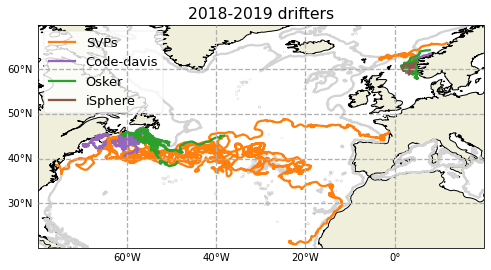

In [22]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plot_bathymetry(ax,esel)

plot_SVPs(SVPs, ax)
plot_dorian_SVPs(dorian_SVPs,ax)
plot_davis(codes, ax)
plot_oskers(oskers, ax)
plot_isphere(isphere,ax)

plot_stokes(stokes, ax)
pretty_map(ax)
ax.legend(loc='best')
ax.set_title(f'{year} drifters')

In [23]:
fig.savefig('2018-2019EastCoastdeployments.png', bbox_inches='tight')